Now we will continue to testing the PSA algorithm and at the end we will compare two to each other.


In [15]:
# Once again we import the necessary commons
from commons import *

processing_times = m1


We defined forward_prop function this is the same as in the previous notebook


In [16]:
def forward_prop(values: list[list[float]]):
    schedules = []

    for value in values:
        number_of_jobs = len(processing_times)
        number_of_machines = len(processing_times[0])

        schedule: list[list[float]] = value.reshape(
            number_of_jobs, number_of_machines)
        machine_times = np.zeros(number_of_machines)

        for i in range(len(processing_times)):
            for j in range(len(processing_times)):
                machine_idx = int(schedule[i, j])
                machine_times[machine_idx - 1] += processing_times[i, j]

        schedules.append(np.max(machine_times))

    return schedules

Parameters in low complexity are also exact same


In [17]:

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

x_max = np.empty(len(processing_times) * len(processing_times))
x_max.fill(len(processing_times))
x_min = np.empty(len(processing_times) * len(processing_times))
x_min.fill(1)
bounds = (x_min, x_max)


Now we start our tests for the low complexity


In [18]:
import time
import pyswarms as ps

times_5x5 = []
results_5x5 = []
for _ in range(100):
    optimizer = ps.single.GlobalBestPSO(
        n_particles=200, dimensions=len(processing_times) * len(processing_times), options=options, bounds=bounds)

    start = time.time()
    stats = optimizer.optimize(forward_prop, iters=100)
    end = time.time()

    times_5x5.append(end - start)
    results_5x5.append(stats[0])

2023-04-11 14:53:46,470 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=293
2023-04-11 14:53:46,732 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 293.0, best pos: [4.20335383 4.32868714 2.65223425 3.8167427  3.23193277 3.20083348
 1.78737402 2.53477558 2.66869008 1.16115299 1.92839647 1.33787195
 4.18036112 1.87996586 2.31681473 3.13603426 1.75836929 3.55949492
 4.25473656 3.87909261 2.50784745 3.8177897  2.7456671  2.46403291
 4.17771962]
2023-04-11 14:53:46,735 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=294
2023-04-11 14:53:47,018 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 294.0, best pos: [4.43972134 2.9489168  2.02334057 2.52014827 1.54203571 4.10752728
 4.17154826 2.764487   1.91895048 3.00

In [19]:
# The methodology is the exact same as we used in ga-efficiency.ipynb also we used the same parameters for specifying accuracy
good_results_5x5: list[list[int, float]] = []
for i in range(len(results_5x5)):
    if results_5x5[i] < 247.0:
        good_results_5x5.append((i, results_5x5[i]))

accuracy_5x5 = len(good_results_5x5) / len(results_5x5) * 100
print(f"Accuracy: {accuracy_5x5}%")

good_times_5x5 = [times_5x5[i] for i, _ in good_results_5x5]

good_times_5x5_mean = np.inf
if len(good_times_5x5) != 0:
    good_times_5x5_mean = np.mean(good_times_5x5) * 1000
print(f"Average time: {good_times_5x5_mean}ms")

Accuracy: 0.0%
Average time: infms


For this level of complexity PSA fails spectacularly. Not even it's slow but it doesn't even achieve even closely what GA does. But it's only for low level complexity level.


In [20]:
processing_times = m4


def forward_prop(values: list[list[float]]):
    schedules = []

    for value in values:
        number_of_jobs = len(processing_times)
        number_of_machines = len(processing_times[0])

        schedule: list[list[float]] = value.reshape(
            number_of_jobs, number_of_machines)
        machine_times = np.zeros(number_of_machines)

        for i in range(len(processing_times)):
            for j in range(len(processing_times)):
                machine_idx = int(schedule[i, j])
                machine_times[machine_idx - 1] += processing_times[i, j]

        schedules.append(np.max(machine_times))

    return schedules


x_max = np.empty(len(processing_times) * len(processing_times))
x_max.fill(len(processing_times))
x_min = np.empty(len(processing_times) * len(processing_times))
x_min.fill(1)
bounds = (x_min, x_max)

In [21]:
times_10x10 = []
results_10x10 = []
for _ in range(100):
    optimizer = ps.single.GlobalBestPSO(
        n_particles=200, dimensions=len(processing_times) * len(processing_times), options=options, bounds=bounds)

    start = time.time()
    stats = optimizer.optimize(forward_prop, iters=100)
    end = time.time()

    times_10x10.append(end - start)
    results_10x10.append(stats[0])

2023-04-11 14:54:14,213 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=632
2023-04-11 14:54:15,065 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 632.0, best pos: [3.80326072 5.31244704 3.39539799 6.01041945 7.08053721 7.58047283
 3.82091391 1.3198187  4.67190344 4.64624249 2.32144567 2.23502313
 1.98262077 5.40562955 6.14906273 5.6169345  3.03236631 4.17394398
 4.74713054 1.63884936 9.43214178 9.43188208 3.19280744 9.99415689
 1.66694389 9.77028369 5.70021505 1.35944317 3.59130165 7.94308509
 7.00632245 3.26263197 9.2639105  5.17249749 2.54730566 4.6034021
 2.92170962 6.79607782 6.69245813 7.17430568 7.72844771 3.53153321
 3.80269787 6.69885841 6.09401799 3.1182251  6.98758239 3.63763664
 2.94801294 8.97591689 4.29611691 2.74524315 5.56097976 1.05860661
 6.53184415 8.92335459 2.53069132 3.0711217  5.36456305 6.30878382
 8.62110362 2.86284873 8

In [22]:
good_results_10x10: list[list[int, float]] = []
for i in range(len(results_10x10)):
    if results_10x10[i] < 1010.0:
        good_results_10x10.append((i, results_10x10[i]))

accuracy_10x10 = len(good_results_10x10) / len(results_10x10) * 100
print(f"Accuracy: {accuracy_10x10}%")

good_times_10x10 = [times_10x10[i] for i, _ in good_results_10x10]

good_times_10x10_mean = np.inf
if len(good_times_10x10) != 0:
    good_times_10x10_mean = np.mean(good_times_10x10) * 1000
print(f"Average time: {good_times_10x10_mean}ms")

Accuracy: 100.0%
Average time: 762.198338508606ms


Now the time is much a little longer on average than GA but the accuracy for the same level is much better.


In [23]:
processing_times = m7


def forward_prop(values: list[list[float]]):
    schedules = []

    for value in values:
        number_of_jobs = len(processing_times)
        number_of_machines = len(processing_times[0])

        schedule: list[list[float]] = value.reshape(
            number_of_jobs, number_of_machines)
        machine_times = np.zeros(number_of_machines)

        for i in range(len(processing_times)):
            for j in range(len(processing_times)):
                machine_idx = int(schedule[i, j])
                machine_times[machine_idx - 1] += processing_times[i, j]

        schedules.append(np.max(machine_times))

    return schedules


x_max = np.empty(len(processing_times) * len(processing_times))
x_max.fill(len(processing_times))
x_min = np.empty(len(processing_times) * len(processing_times))
x_min.fill(1)
bounds = (x_min, x_max)


In [24]:
times_15x15 = []
results_15x15 = []
for _ in range(100):
    optimizer = ps.single.GlobalBestPSO(
        n_particles=200, dimensions=len(processing_times) * len(processing_times), options=options, bounds=bounds)

    start = time.time()
    stats = optimizer.optimize(forward_prop, iters=100)
    end = time.time()

    times_15x15.append(end - start)
    results_15x15.append(stats[0])


2023-04-11 14:55:30,801 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=980
2023-04-11 14:55:32,381 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 980.0, best pos: [14.68334143  7.5948281   3.20093811  5.19780208  9.79539816  6.85512007
  4.44429045  5.85762549  2.14937731  8.17106834  8.88577707  6.00518
  7.06925962 10.4331059  10.99008358 13.53240151  2.64013903 14.9626737
  7.06983344  2.29290049  5.39443915 12.07280383 10.1465463  13.39816375
  2.11200999  1.75793099  8.56308052  2.99902109  3.71756176 12.23124357
 12.94548177  4.40146827  8.22892723  7.1967216   8.77263418 14.61614646
  7.53076709  5.39545591  4.39448987  9.04722039 13.38130207  6.95302794
 12.73099758 14.25602269  3.85503076 10.44834624  3.48650081  4.71093653
  8.58682971  8.11820755  6.12986078  5.00755818 12.08492096  5.63780195
  6.44710938 10.08452915 11.26924996  9.

In [25]:

good_results_15x15: list[list[int, float]] = []
for i in range(len(results_15x15)):
    if results_15x15[i] < 2350.0:
        good_results_15x15.append((i, results_15x15[i]))

accuracy_15x15 = len(good_results_15x15) / len(results_15x15) * 100
print(f"Accuracy: {accuracy_15x15}%")

good_times_15x15 = [times_15x15[i] for i, _ in good_results_15x15]

good_times_15x15_mean = np.inf
if len(good_times_15x15) != 0:
    good_times_15x15_mean = np.mean(good_times_15x15) * 1000
print(f"Average time: {good_times_15x15_mean}ms")

Accuracy: 100.0%
Average time: 1644.2332458496094ms


And again the accuracy is 100% percent, but the time is not so good


In [26]:
from pandas import DataFrame

d = {"5x5.accuracy": [accuracy_5x5], "5x5.good_times_mean": [good_times_5x5_mean], "10x10.accuracy": [accuracy_10x10],
     "10x10.good_times_mean": [good_times_10x10_mean], "15x15.accuracy": [accuracy_15x15], "15x15.good_times_mean": [good_times_15x15_mean]}
df = DataFrame(data=d)

display(df)

,5x5.accuracy,5x5.good_times_mean,10x10.accuracy,10x10.good_times_mean,15x15.accuracy,15x15.good_times_mean
0,0.0,inf,100.0,762.198339,100.0,1644.233246


<Axes: title={'center': 'Mean Time'}, xlabel='Time (ms)'>

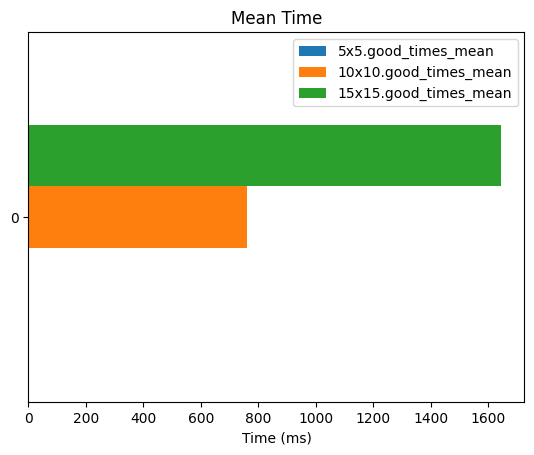

In [27]:
df.plot.barh(y=["5x5.good_times_mean", "10x10.good_times_mean",
             "15x15.good_times_mean"], title="Mean Time", xlabel="Time (ms)")


Since the easiest level did not achieve our level of accuracy it's time is not included.


In [ ]:
d_PSA = {
    "5x5.results": results_5x5,
    "5x5.times": times_5x5,
    "10x10.results": results_10x10,
    "10x10.times": times_10x10,
    "15x15.results": results_15x15,
    "15x15.times": times_15x15
}

df_PSA = DataFrame(data=d_PSA)
df_PSA.to_csv("PSA.csv")
